In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [27]:
IMG_WIDTH = 224
IMG_HEIGHT = 224
NUM_CHANNELS = 3
CLASS_NAMES = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]

def read_and_decode(filename,reshape_dims):
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, dtype=tf.float32)

    return tf.image.resize(img, reshape_dims)


def show_image(filename):
    img = read_and_decode(filename,(IMG_WIDTH,IMG_HEIGHT))
    plt.imshow(img.numpy())
    plt.show()

def parse_csvline(csv_row):
    record_defaults = ["path", "flower"]
    filename, label = tf.io.decode_csv(csv_row, record_defaults)
    img = read_and_decode(filename, [IMG_WIDTH, IMG_HEIGHT])
    return img, label

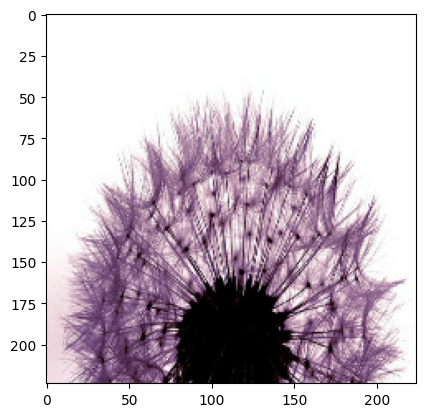

In [34]:
# show_image('./sample_datasets/image/test_image.png')
# show_image("gs://cloud-ml-data/img/flower_photos/daisy/100080576_f52e8ee070_n.jpg")
show_image("gs://cloud-ml-data/img/flower_photos/dandelion/5705695593_d79286ac0d.jpg")

In [22]:
dataset = (tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/train_set.csv").map(parse_csvline))

In [23]:
for img, label in dataset.take(3):
    avg = tf.math.reduce_mean(img, axis=[0, 1])
    print(label, avg)

tf.Tensor(b'daisy', shape=(), dtype=string) tf.Tensor([0.35889465 0.36257476 0.26932985], shape=(3,), dtype=float32)
tf.Tensor(b'dandelion', shape=(), dtype=string) tf.Tensor([0.32278505 0.32278505 0.32278505], shape=(3,), dtype=float32)
tf.Tensor(b'dandelion', shape=(), dtype=string) tf.Tensor([0.20397638 0.13298166 0.07217269], shape=(3,), dtype=float32)


2024-07-06 14:03:26.750843: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
])
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [37]:
pred = model.predict(tf.reshape(img,
[1, IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS]))
prob = tf.math.softmax(pred)[pred_label_index]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got <tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 0, 0])>

In [36]:
pred_label_index = tf.math.argmax(pred)
pred_label_index.numpy()

array([0, 0, 0, 0, 0])